### Przygotowanie do zajęć

1. W konsoli linuxowej:
 - pip install gensim
 - pip install nltk

2. w Jupyterze (pobieranie zasobów):
 - `import nltk`
 - `nltk.download()` (wyskoczy okienko)
 - zanaczamy wiersz "popular" i klikamy "download"

3. w Jupyterze:
 - `from sklearn.datasets import fetch_20newsgroups`
 - `newsgroups_train = fetch_20newsgroups(subset='train')`
 
 
 
### Materiały i źródła:

https://radimrehurek.com/gensim/wiki.html

http://radimrehurek.com/topic_modeling_tutorial/2%20-%20Topic%20Modeling.html

https://www.ariddell.org/lda.html

http://brandonrose.org/clustering

http://totoharyanto.staff.ipb.ac.id/files/2012/10/Building-Machine-Learning-Systems-with-Python-Richert-Coelho.pdf

https://de.dariah.eu/tatom/topic_model_python.html

# Analiza danych tekstowych - text mining

## Obróbka tekstu

In [1]:
import nltk
from bs4 import BeautifulSoup
import numpy as np

wiki = "http://en.wikipedia.org/wiki/"
titles = ["Integral", "Riemann_integral", "Riemann-Stieltjes_integral", "Derivative",
    "Limit_of_a_sequence", "Edvard_Munch", "Vincent_van_Gogh", "Jan_Matejko",
    "Lev_Tolstoj", "Franz_Kafka", "J._R._R._Tolkien"]

from urllib.request import urlopen

def parse(url):        
    x = urlopen(url).read()
    x = BeautifulSoup(x).find("div", id="bodyContent").find_all("p")
    return(x)

articles = [parse(url) for url in [wiki+x for x in titles]]
articles = [" ".join([str(paragraph) for paragraph in article]) for article in articles]

In [2]:
art = articles[0][:300]
art

'<p>In <a href="/wiki/Mathematics" title="Mathematics">mathematics</a>, an <b>integral</b> assigns numbers to functions in a way that can describe displacement, area, volume, and other concepts that arise by combining <a href="/wiki/Infinitesimal" title="Infinitesimal">infinitesimal</a> data. Integra'

In [3]:
import re

In [4]:
re.findall("<.+?>", art)

['<p>',
 '<a href="/wiki/Mathematics" title="Mathematics">',
 '</a>',
 '<b>',
 '</b>',
 '<a href="/wiki/Infinitesimal" title="Infinitesimal">',
 '</a>']

In [5]:
art = re.sub("<.+?>", " ", art)
art

' In  mathematics , an  integral  assigns numbers to functions in a way that can describe displacement, area, volume, and other concepts that arise by combining  infinitesimal  data. Integra'

In [6]:
articles = [re.sub("<.+?>", " ", a) for a in articles]
articles[0]

' In  mathematics , an  integral  assigns numbers to functions in a way that can describe displacement, area, volume, and other concepts that arise by combining  infinitesimal  data. Integration is one of the two main operations of  calculus ; its inverse operation,  differentiation , is the other. Given a  function   f  of a  real   variable   x  and an  interval   [ a ,  b ]  of the  real line , the  definite integral  of  f  from   a   to   b   can be interpreted informally as the signed  area  of the region in the  xy -plane that is bounded by the  graph  of  f , the  x -axis and the vertical lines   x  =  a   and   x  =  b  . It is denoted\n   The operation of integration, up to an additive constant, is the inverse of the operation of differentiation. For this reason, the term  integral  may also refer to the related notion of the  antiderivative , called an  indefinite integral , a function  F  whose  derivative  is the given function  f . In this case, it is written:\n   The int

In [7]:
art.lower()

' in  mathematics , an  integral  assigns numbers to functions in a way that can describe displacement, area, volume, and other concepts that arise by combining  infinitesimal  data. integra'

In [8]:
articles = [a.lower() for a in articles]
type(articles[0])

str

In [9]:
articles[0]

' in  mathematics , an  integral  assigns numbers to functions in a way that can describe displacement, area, volume, and other concepts that arise by combining  infinitesimal  data. integration is one of the two main operations of  calculus ; its inverse operation,  differentiation , is the other. given a  function   f  of a  real   variable   x  and an  interval   [ a ,  b ]  of the  real line , the  definite integral  of  f  from   a   to   b   can be interpreted informally as the signed  area  of the region in the  xy -plane that is bounded by the  graph  of  f , the  x -axis and the vertical lines   x  =  a   and   x  =  b  . it is denoted\n   the operation of integration, up to an additive constant, is the inverse of the operation of differentiation. for this reason, the term  integral  may also refer to the related notion of the  antiderivative , called an  indefinite integral , a function  f  whose  derivative  is the given function  f . in this case, it is written:\n   the int

In [10]:
re.findall("\n", articles[0])

articles = [re.sub("\n", " ", a) for a in articles]
articles = [re.sub("\t", " ", a) for a in articles]

articles[0]

' in  mathematics , an  integral  assigns numbers to functions in a way that can describe displacement, area, volume, and other concepts that arise by combining  infinitesimal  data. integration is one of the two main operations of  calculus ; its inverse operation,  differentiation , is the other. given a  function   f  of a  real   variable   x  and an  interval   [ a ,  b ]  of the  real line , the  definite integral  of  f  from   a   to   b   can be interpreted informally as the signed  area  of the region in the  xy -plane that is bounded by the  graph  of  f , the  x -axis and the vertical lines   x  =  a   and   x  =  b  . it is denoted    the operation of integration, up to an additive constant, is the inverse of the operation of differentiation. for this reason, the term  integral  may also refer to the related notion of the  antiderivative , called an  indefinite integral , a function  f  whose  derivative  is the given function  f . in this case, it is written:    the integ

In [11]:
articles = [nltk.word_tokenize(a) for a in articles]

In [12]:
articles[0]

['in',
 'mathematics',
 ',',
 'an',
 'integral',
 'assigns',
 'numbers',
 'to',
 'functions',
 'in',
 'a',
 'way',
 'that',
 'can',
 'describe',
 'displacement',
 ',',
 'area',
 ',',
 'volume',
 ',',
 'and',
 'other',
 'concepts',
 'that',
 'arise',
 'by',
 'combining',
 'infinitesimal',
 'data',
 '.',
 'integration',
 'is',
 'one',
 'of',
 'the',
 'two',
 'main',
 'operations',
 'of',
 'calculus',
 ';',
 'its',
 'inverse',
 'operation',
 ',',
 'differentiation',
 ',',
 'is',
 'the',
 'other',
 '.',
 'given',
 'a',
 'function',
 'f',
 'of',
 'a',
 'real',
 'variable',
 'x',
 'and',
 'an',
 'interval',
 '[',
 'a',
 ',',
 'b',
 ']',
 'of',
 'the',
 'real',
 'line',
 ',',
 'the',
 'definite',
 'integral',
 'of',
 'f',
 'from',
 'a',
 'to',
 'b',
 'can',
 'be',
 'interpreted',
 'informally',
 'as',
 'the',
 'signed',
 'area',
 'of',
 'the',
 'region',
 'in',
 'the',
 'xy',
 '-plane',
 'that',
 'is',
 'bounded',
 'by',
 'the',
 'graph',
 'of',
 'f',
 ',',
 'the',
 'x',
 '-axis',
 'and',
 't

In [13]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
articles = [[w for w in a if w not in stopwords] for a in articles]
articles[0]

['mathematics',
 ',',
 'integral',
 'assigns',
 'numbers',
 'functions',
 'way',
 'describe',
 'displacement',
 ',',
 'area',
 ',',
 'volume',
 ',',
 'concepts',
 'arise',
 'combining',
 'infinitesimal',
 'data',
 '.',
 'integration',
 'one',
 'two',
 'main',
 'operations',
 'calculus',
 ';',
 'inverse',
 'operation',
 ',',
 'differentiation',
 ',',
 '.',
 'given',
 'function',
 'f',
 'real',
 'variable',
 'x',
 'interval',
 '[',
 ',',
 'b',
 ']',
 'real',
 'line',
 ',',
 'definite',
 'integral',
 'f',
 'b',
 'interpreted',
 'informally',
 'signed',
 'area',
 'region',
 'xy',
 '-plane',
 'bounded',
 'graph',
 'f',
 ',',
 'x',
 '-axis',
 'vertical',
 'lines',
 'x',
 '=',
 'x',
 '=',
 'b',
 '.',
 'denoted',
 'operation',
 'integration',
 ',',
 'additive',
 'constant',
 ',',
 'inverse',
 'operation',
 'differentiation',
 '.',
 'reason',
 ',',
 'term',
 'integral',
 'may',
 'also',
 'refer',
 'related',
 'notion',
 'antiderivative',
 ',',
 'called',
 'indefinite',
 'integral',
 ',',
 'func

In [15]:
stemmer = nltk.PorterStemmer()

In [16]:
[stemmer.stem(w) for w in ['walk', 'walking', 'walked']]

['walk', 'walk', 'walk']

In [17]:
[stemmer.stem(w) for w in ['teach', 'taught', 'teaching']]

['teach', 'taught', 'teach']

In [18]:
articles = [[stemmer.stem(w) for w in a] for a in articles]
articles

[['mathemat',
  ',',
  'integr',
  'assign',
  'number',
  'function',
  'way',
  'describ',
  'displac',
  ',',
  'area',
  ',',
  'volum',
  ',',
  'concept',
  'aris',
  'combin',
  'infinitesim',
  'data',
  '.',
  'integr',
  'one',
  'two',
  'main',
  'oper',
  'calculu',
  ';',
  'invers',
  'oper',
  ',',
  'differenti',
  ',',
  '.',
  'given',
  'function',
  'f',
  'real',
  'variabl',
  'x',
  'interv',
  '[',
  ',',
  'b',
  ']',
  'real',
  'line',
  ',',
  'definit',
  'integr',
  'f',
  'b',
  'interpret',
  'inform',
  'sign',
  'area',
  'region',
  'xy',
  '-plane',
  'bound',
  'graph',
  'f',
  ',',
  'x',
  '-axi',
  'vertic',
  'line',
  'x',
  '=',
  'x',
  '=',
  'b',
  '.',
  'denot',
  'oper',
  'integr',
  ',',
  'addit',
  'constant',
  ',',
  'invers',
  'oper',
  'differenti',
  '.',
  'reason',
  ',',
  'term',
  'integr',
  'may',
  'also',
  'refer',
  'relat',
  'notion',
  'antideriv',
  ',',
  'call',
  'indefinit',
  'integr',
  ',',
  'function',

In [19]:
len(articles)

11

In [20]:
" ".join(['teach', 'taught', 'teaching'])

'teach taught teaching'

In [21]:
articles = [" ".join(a) for a in articles]
articles[0]

"mathemat , integr assign number function way describ displac , area , volum , concept aris combin infinitesim data . integr one two main oper calculu ; invers oper , differenti , . given function f real variabl x interv [ , b ] real line , definit integr f b interpret inform sign area region xy -plane bound graph f , x -axi vertic line x = x = b . denot oper integr , addit constant , invers oper differenti . reason , term integr may also refer relat notion antideriv , call indefinit integr , function f whose deriv given function f . case , written : integr discuss articl term definit integr . fundament theorem calculu connect differenti definit integr : f continu real-valu function defin close interv [ , b ] , antideriv f f known , definit integr f interv given principl integr formul independ isaac newton gottfri wilhelm leibniz late 17th centuri , thought integr infinit sum rectangl infinitesim width . bernhard riemann later gave rigor mathemat definit integr , base limit procedur ap

In [22]:
import string

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
ord(string.punctuation[2])

35

In [25]:
chr(35)

'#'

In [26]:
punk_table = str.maketrans({key: None for key in string.punctuation})
punk_table

{33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 91: None,
 92: None,
 93: None,
 94: None,
 95: None,
 96: None,
 123: None,
 124: None,
 125: None,
 126: None}

In [27]:
articles = [a.translate(punk_table) for a in articles]
articles[0]

'mathemat  integr assign number function way describ displac  area  volum  concept aris combin infinitesim data  integr one two main oper calculu  invers oper  differenti   given function f real variabl x interv   b  real line  definit integr f b interpret inform sign area region xy plane bound graph f  x axi vertic line x  x  b  denot oper integr  addit constant  invers oper differenti  reason  term integr may also refer relat notion antideriv  call indefinit integr  function f whose deriv given function f  case  written  integr discuss articl term definit integr  fundament theorem calculu connect differenti definit integr  f continu realvalu function defin close interv   b   antideriv f f known  definit integr f interv given principl integr formul independ isaac newton gottfri wilhelm leibniz late 17th centuri  thought integr infinit sum rectangl infinitesim width  bernhard riemann later gave rigor mathemat definit integr  base limit procedur approxim area curvilinear region break re

# Reprezentacje tekstu

## Podstawowa reprezentacja macierzowa - liczności

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
cv = CountVectorizer(min_df=2, max_df=0.3)

cv.fit(articles)
arts = cv.transform(articles)
arts

<11x1596 sparse matrix of type '<class 'numpy.int64'>'
	with 3804 stored elements in Compressed Sparse Row format>

In [35]:
cv.vocabulary_

{'aris': 300,
 'infinitesim': 878,
 'data': 545,
 'invers': 900,
 'differenti': 578,
 'interv': 894,
 'xy': 1589,
 'plane': 1159,
 'graph': 791,
 'axi': 335,
 'vertic': 1534,
 'connect': 488,
 'isaac': 903,
 'newton': 1063,
 'gottfri': 783,
 'wilhelm': 1575,
 'leibniz': 952,
 '17th': 56,
 'rectangl': 1250,
 'width': 1574,
 'riemann': 1289,
 'procedur': 1193,
 'break': 380,
 'thin': 1474,
 'domain': 597,
 'endpoint': 651,
 'surfac': 1442,
 'document': 596,
 'ancient': 273,
 'astronom': 317,
 'eudoxu': 677,
 'ca': 400,
 'sought': 1376,
 'divis': 595,
 'employ': 645,
 'archimed': 296,
 'china': 430,
 'chines': 431,
 'mathematician': 996,
 'zu': 1595,
 'east': 626,
 'latin': 941,
 'cavalieri': 415,
 'lay': 943,
 'foundat': 744,
 'comput': 481,
 'barrow': 340,
 'exploit': 703,
 'solv': 1370,
 'comprehens': 480,
 'framework': 750,
 'analysi': 269,
 'notat': 1082,
 'drawn': 608,
 'rigour': 1291,
 'attack': 319,
 'ghost': 775,
 'depart': 567,
 'quantiti': 1218,
 'riemannintegr': 1290,
 'contex

In [36]:
cv.get_feature_names()

['10000',
 '104',
 '113',
 '114',
 '115',
 '117',
 '118',
 '121',
 '122',
 '123',
 '124',
 '125',
 '128',
 '130',
 '131',
 '132',
 '133',
 '136',
 '137',
 '138',
 '139',
 '140',
 '143',
 '144',
 '145',
 '146',
 '147',
 '149',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '1675',
 '169',
 '170',
 '171',
 '173',
 '174',
 '175',
 '176',
 '178',
 '1789',
 '179',
 '1794',
 '17th',
 '180',
 '181',
 '1813',
 '1819',
 '182',
 '183',
 '184',
 '185',
 '1851',
 '1852',
 '1853',
 '1855',
 '1856',
 '1857',
 '1859',
 '186',
 '1860',
 '1862',
 '1863',
 '1864',
 '1866',
 '1868',
 '1869',
 '187',
 '1871',
 '1872',
 '1873',
 '1874',
 '1877',
 '1878',
 '1879',
 '188',
 '1880',
 '1881',
 '1882',
 '1884',
 '1885',
 '1887',
 '1888',
 '189',
 '1891',
 '1893',
 '1895',
 '1896',
 '1898',
 '1899',
 '18th',
 '190',
 '1901',
 '1902',
 '1903',
 '1905',
 '1907',
 '1908',
 '1915',
 '1916',
 '1917',
 '1918',
 '1919',
 '192',
 '1920',
 

In [37]:
cv.get_feature_names().index('compact')

471

In [38]:
cv.vocabulary_['compact']

471

In [32]:
arts.todense()

matrix([[0, 0, 0, ..., 0, 0, 2],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 2],
        [0, 1, 1, ..., 2, 1, 0]], dtype=int64)

In [42]:
print(cv.get_feature_names()[355])
arts.getcol(355).todense()

bibl


matrix([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [3],
        [0],
        [1],
        [0],
        [1]], dtype=int64)

In [44]:
arts.getcol(cv.vocabulary_['bibl']).todense()

matrix([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [3],
        [0],
        [1],
        [0],
        [1]], dtype=int64)

In [47]:
arts.getrow(0).todense()

matrix([[0, 0, 0, ..., 0, 0, 2]], dtype=int64)

#### Zadanie

Wypisać k najczęstszych słów dla każdego dokumentu.

In [ ]:
feature_names = 

In [79]:
import string
import itertools

t = articles[1]
tbl = sorted(t.strip(string.punctuation).split())
 
""" Za pomoca grupowania i funkcji mapujacej tworzymy liste obiektow tuple w postaci (slowo, liczba_wystapien) """
grouped_data = list(map(
                        lambda x : (x[0], len(list(x[1]))), 
                        itertools.groupby(tbl, lambda x : x)
                        )
                    )
 
""" Wybieramy z listy tuple ktory ma maksymalna liczbe_wystapien """
word = max(grouped_data, key = lambda x : x[1])
 
print("Najczesciej wystepujace slowo: " + word[0] + ", liczba wystapien: " + str(word[1]))   

Najczesciej wystepujace slowo: integr, liczba wystapien: 124


In [59]:
import string
import itertools
 
t = articles[10]
tbl = sorted(t.strip(string.punctuation).split())
 
""" Za pomoca grupowania i funkcji mapujacej tworzymy liste obiektow tuple w postaci (slowo, liczba_wystapien) """
grouped_data = list(map(
                        lambda x : (x[0], len(list(x[1]))), 
                        itertools.groupby(tbl, lambda x : x)
                        )
                    )
 
""" Wybieramy z listy tuple ktory ma maksymalna liczbe_wystapien """
word = max(grouped_data, key = lambda x : x[1])
 
print("Najczesciej wystepujace slowo: " + word[0] + ", liczba wystapien: " + str(word[1]))   

Najczesciej wystepujace slowo: tolkien, liczba wystapien: 271


In [74]:
import string
import operator
     
text = articles[0]
my_list = text.split()
 
#--
 
words_only_list = [word.strip(string.punctuation) for word in my_list]
 
 
#--
 
unique_words = list(set(words_only_list))
 
words_dict = {}
 
for i in unique_words:
    words_dict[i] = 0
 
for i in words_dict.keys():
    for j in words_only_list:
        if i == j:
            words_dict[i] += 1
 
sorted_dict = sorted(words_dict.items(), key=operator.itemgetter(1))
 
for i, j in reversed(sorted_dict):
    if j == 1:
        print('Slowo "%s" wystąpilo %s raz.' % (i, j))
    else:
        print('Slowo "%s" wystąpilo %s razy.' % (i, j))

Slowo "integr" wystąpilo 292 razy.
Slowo "function" wystąpilo 139 razy.
Slowo "x" wystąpilo 109 razy.
Slowo "f" wystąpilo 75 razy.
Slowo "b" wystąpilo 57 razy.
Slowo "use" wystąpilo 54 razy.
Slowo "valu" wystąpilo 42 razy.
Slowo "1" wystąpilo 41 razy.
Slowo "displaystyl" wystąpilo 39 razy.
Slowo "interv" wystąpilo 39 razy.
Slowo "sum" wystąpilo 39 razy.
Slowo "2" wystąpilo 38 razy.
Slowo "area" wystąpilo 34 razy.
Slowo "riemann" wystąpilo 32 razy.
Slowo "differenti" wystąpilo 30 razy.
Slowo "calculu" wystąpilo 30 razy.
Slowo "approxim" wystąpilo 29 razy.
Slowo "definit" wystąpilo 28 razy.
Slowo "comput" wystąpilo 27 razy.
Slowo "method" wystąpilo 26 razy.
Slowo "one" wystąpilo 26 razy.
Slowo "defin" wystąpilo 26 razy.
Slowo "antideriv" wystąpilo 25 razy.
Slowo "limit" wystąpilo 24 razy.
Slowo "gener" wystąpilo 24 razy.
Slowo "volum" wystąpilo 22 razy.
Slowo "variabl" wystąpilo 21 razy.
Slowo "call" wystąpilo 21 razy.
Slowo "vector" wystąpilo 21 razy.
Slowo "surfac" wystąpilo 21 razy.
S

In [78]:
k =10 

feature_names = np.array(cv.get_feature_names())

for i in range (len(articles)):
    sorted_indices = arts.getrow(i).todense().A.ravel().argsort()
    best_indices = sorted_indices[-k:][::-1]
    print(titles[1].upper())
    print(feature_names[best_indices])
    print()

RIEMANN_INTEGRAL
['interv' 'riemann' 'differenti' 'comput' 'vector' 'surfac' 'lebesgu' 'dx'
 'width' 'integrand']

RIEMANN_INTEGRAL
['riemann' 'interv' 'tag' 'lebesgu' 'darboux' 'choos' 'subinterv' 'alway'
 'riemannintegr' 'refin']

RIEMANN_INTEGRAL
['riemann' 'stieltj' 'interv' 'lebesgu' 'distribut' 'integrand'
 'discontinu' 'banach' 'densiti' 'norm']

RIEMANN_INTEGRAL
['differenti' 'vector' 'notat' 'partial' 'tangent' 'graph' 'comput'
 'coordin' 'domain' 'newton']

RIEMANN_INTEGRAL
['lim' 'topolog' 'diverg' 'frac' 'analysi' 'infin' 'index' 'cauchi'
 'arbitrarili' 'ultim']

RIEMANN_INTEGRAL
['oil' 'berlin' 'selfportrait' '1893' 'portrait' 'painter' 'anxieti'
 'nazi' '1907' 'drink']

RIEMANN_INTEGRAL
['van' 'gogh' '1888' 'vincent' 'gauguin' 'portrait' 'colour' 'yellow'
 'tree' 'painter']

RIEMANN_INTEGRAL
['jan' 'poland' 'painter' 'portrait' 'award' 'king' '1860' '1862' '1863'
 'graduat']

RIEMANN_INTEGRAL
['russian' 'anarchist' 'peac' 'anna' 'teach' 'kingdom' 'reject' 'land'
 'leo' 'c

## Przekształcenie Tf-Idf

Przekształcenie to mierzy jak ważne są poszczególne słowa w poszczególnych dokumentach.

Tf - term frequency - częstość słowa w dokumencie.

Idf - inverse document frequency - odwrotność częstości słowa w zbiorze dokumentów.

Wartość ważności słowa $w$ w dokumencie $d$ to:

$$TFIDF(w,d) = tf(w,d) \cdot idf(w).$$

Istnieje wiele różnych wariantów tej miary. Podstawowa to:

**tf(w,d)** - liczba wystąpień słowa $w$ w dokumencie $d$ podzielona przez liczbę wszystkich słów w dokumencie $d$;

**idf(w)** - logarytm z liczby dokumentów w korpusie podzielonej przez liczbę dokumentów, w których wystąpiło słowo $w$.

### https://en.wikipedia.org/wiki/Tf%E2%80%93idf

### https://en.wikipedia.org/wiki/Tf%E2%80%93idf

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
tfidf_vec = TfidfVectorizer(min_df=2, max_df=0.3)
tfidf_matrix = tfidf_vec.fit_transform(articles)

In [83]:
tfidf_matrix

<11x1596 sparse matrix of type '<class 'numpy.float64'>'
	with 3804 stored elements in Compressed Sparse Row format>

In [84]:
tfidf_matrix.getrow(3).todense().A[tfidf_matrix.getrow(3).todense() > 0]

array([0.01576753, 0.01386666, 0.01576753, 0.01576753, 0.02773332,
       0.01576753, 0.02773332, 0.01576753, 0.02773332, 0.01386666,
       0.02773332, 0.01576753, 0.01576753, 0.01576753, 0.01576753,
       0.04730258, 0.04159997, 0.03153506, 0.01576753, 0.01576753,
       0.01386666, 0.03153506, 0.07883764, 0.01576753, 0.04159997,
       0.01576753, 0.03153506, 0.04159997, 0.01576753, 0.15253324,
       0.01576753, 0.12614022, 0.01576753, 0.01576753, 0.01576753,
       0.01576753, 0.52693301, 0.01386666, 0.01386666, 0.01386666,
       0.11093327, 0.02773332, 0.09460517, 0.07883764, 0.01576753,
       0.01576753, 0.01576753, 0.01386666, 0.07883764, 0.01386666,
       0.04730258, 0.01386666, 0.01576753, 0.02773332, 0.02773332,
       0.01576753, 0.04159997, 0.01386666, 0.04730258, 0.06307011,
       0.22186653, 0.01386666, 0.01386666, 0.01576753, 0.01386666,
       0.07883764, 0.02773332, 0.01576753, 0.02773332, 0.01386666,
       0.01386666, 0.08319995, 0.01386666, 0.02773332, 0.03153

In [85]:
k = 10
feature_names1 = np.array(cv.get_feature_names())
feature_names2 = np.array(tfidf_vec.get_feature_names())
for i in range(len(articles)):
    sorted_indices1 = arts.getrow(i).todense().A.ravel().argsort()
    best_indices1 = sorted_indices1[-k:][::-1]
    sorted_indices2 = tfidf_matrix.getrow(i).todense().A.ravel().argsort()
    best_indices2 = sorted_indices2[-k:][::-1]
    print(titles[i].upper())
    print(feature_names1[best_indices1])
    print(feature_names2[best_indices2])
    print()

INTEGRAL
['interv' 'riemann' 'differenti' 'comput' 'vector' 'surfac' 'lebesgu' 'dx'
 'width' 'integrand']
['interv' 'riemann' 'differenti' 'comput' 'vector' 'surfac' 'dx' 'lebesgu'
 'width' 'leibniz']

RIEMANN_INTEGRAL
['riemann' 'interv' 'tag' 'lebesgu' 'darboux' 'choos' 'subinterv' 'alway'
 'riemannintegr' 'refin']
['riemann' 'interv' 'tag' 'lebesgu' 'choos' 'darboux' 'subinterv'
 'riemannintegr' 'alway' 'refin']

RIEMANN-STIELTJES_INTEGRAL
['riemann' 'stieltj' 'interv' 'lebesgu' 'distribut' 'integrand'
 'discontinu' 'banach' 'densiti' 'norm']
['riemann' 'stieltj' 'lebesgu' 'interv' 'distribut' 'integrand' 'densiti'
 'discontinu' 'banach' 'cantor']

DERIVATIVE
['differenti' 'vector' 'notat' 'partial' 'tangent' 'graph' 'comput'
 'coordin' 'domain' 'newton']
['differenti' 'vector' 'notat' 'tangent' 'partial' 'graph' 'comput'
 'coordin' 'domain' 'leibniz']

LIMIT_OF_A_SEQUENCE
['lim' 'topolog' 'diverg' 'frac' 'analysi' 'infin' 'index' 'cauchi'
 'arbitrarili' 'ultim']
['lim' 'topolog' 'd

## LSI - *Latent Semantic Indexing* 

Czyli wykrycie w tekście znaczeń poprzez rozkład macierzy TfIdf przy użyciu SVD.


In [88]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=3)
svd.fit(tfidf_matrix.todense())

TruncatedSVD(n_components=3)

In [90]:
lsi_matrix = svd.transform(tfidf_matrix.todense())
lsi_matrix

array([[ 0.83709174,  0.00615178,  0.3174928 ],
       [ 0.85332591, -0.07437658, -0.33576969],
       [ 0.78280968, -0.08128847, -0.41230797],
       [ 0.38516484,  0.05051838,  0.79675056],
       [ 0.10660596,  0.06601729,  0.40842259],
       [ 0.02981839,  0.58280674, -0.067626  ],
       [ 0.01335671,  0.31850017, -0.06740792],
       [ 0.01951127,  0.44217118, -0.06342546],
       [ 0.03059415,  0.47226471, -0.04071589],
       [ 0.046974  ,  0.60587244, -0.02528565],
       [ 0.04154677,  0.53642996, -0.00779253]])

Text(0.5, 0, '3 coponent')

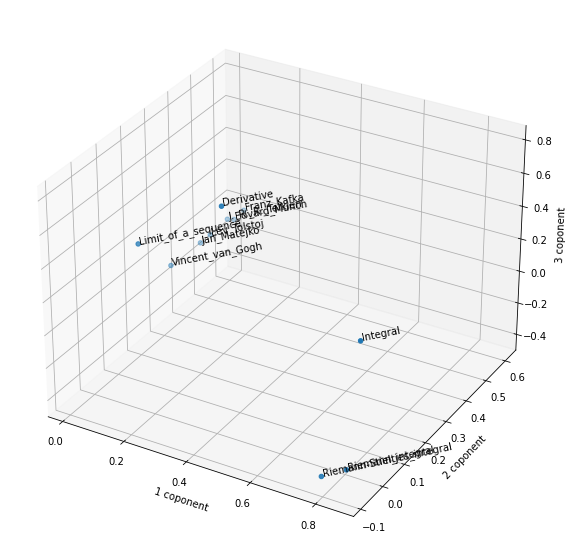

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 10))
ax = fig.gca(projection='3d')
ax.scatter(xs=lsi_matrix[:, 0], ys=lsi_matrix[:, 1], zs=lsi_matrix[:, 2])
for i, title in enumerate(titles):
    ax.text(lsi_matrix[i, 0], lsi_matrix[i, 1], lsi_matrix[i, 2], title, (1, 1, 0))
ax.set_xlabel('1 coponent')
ax.set_ylabel('2 coponent')
ax.set_zlabel('3 coponent')

### Uwaga: do mierzenia podobieństwa tekstów dobrze sprawdza się miara cosinusowa!

https://en.wikipedia.org/wiki/Cosine_similarity

Mierzy ona podobieństwo wektorów na podstawie rozkładu wartości elementów (proporcji), a nie wartości bewzględnych. Matematycznie: podobieństwo jest określane na podstawie kąta pomiędzy wektorami (wartości cosinusa tego kąta), a nie na podstawie długości wektorów.

## Zadanie - otagować teksty korpusu 20newsgroups

In [104]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [105]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [106]:
newsgroups_train.target

array([7, 4, 4, ..., 3, 1, 8])

In [107]:
newsgroups_train.target.shape

(11314,)

In [108]:
newsgroups_train.data[1]

"From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 11\nNNTP-Posting-Host: carson.u.washington.edu\n\nA fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't answered this\npoll. Thanks.\n\nGuy Kuo <guykuo@u.washington.edu>\n"

In [119]:
import re

In [133]:
newsgroups_train.data[11]

'From: david@terminus.ericsson.se (David Bold)\nSubject: Re: Question for those with popular morality\nReply-To: david@terminus.ericsson.se\nDistribution: world\nOrganization: Camtec Electronics (Ericsson), Leicester, England\nLines: 77\nNntp-Posting-Host: bangkok\n\nIn article 17570@freenet.carleton.ca, ad354@Freenet.carleton.ca (James Owens) writes:\n>\n>In a previous article, david@terminus.ericsson.se (David Bold) says:\n>\n>>\n>>I don\'t mean to be rude, but I think that you\'ve got hold of the wrong\n>>end of a different stick...\n>>\n>>David\n>\n>I had a look at your posting again and I see what you mean!  I was so\n>intent on explaining how Jung thought we could be more moral than God that\n>I overlooked your main line of thought.\n>\n>You seem to be saying that, God being unknowable, His morality is unknowable.\n\nYep, that\'s pretty much it. I\'m not a Jew but I understand that this is the\nJewish way of thinking. However, the Jews believe that the Covenant between\nYHWH and 

In [134]:
news = newsgroups_train.data[11]
news

'From: david@terminus.ericsson.se (David Bold)\nSubject: Re: Question for those with popular morality\nReply-To: david@terminus.ericsson.se\nDistribution: world\nOrganization: Camtec Electronics (Ericsson), Leicester, England\nLines: 77\nNntp-Posting-Host: bangkok\n\nIn article 17570@freenet.carleton.ca, ad354@Freenet.carleton.ca (James Owens) writes:\n>\n>In a previous article, david@terminus.ericsson.se (David Bold) says:\n>\n>>\n>>I don\'t mean to be rude, but I think that you\'ve got hold of the wrong\n>>end of a different stick...\n>>\n>>David\n>\n>I had a look at your posting again and I see what you mean!  I was so\n>intent on explaining how Jung thought we could be more moral than God that\n>I overlooked your main line of thought.\n>\n>You seem to be saying that, God being unknowable, His morality is unknowable.\n\nYep, that\'s pretty much it. I\'m not a Jew but I understand that this is the\nJewish way of thinking. However, the Jews believe that the Covenant between\nYHWH and 

In [135]:
re.findall("<.>", news)

[]

In [136]:
news.lower()

'from: david@terminus.ericsson.se (david bold)\nsubject: re: question for those with popular morality\nreply-to: david@terminus.ericsson.se\ndistribution: world\norganization: camtec electronics (ericsson), leicester, england\nlines: 77\nnntp-posting-host: bangkok\n\nin article 17570@freenet.carleton.ca, ad354@freenet.carleton.ca (james owens) writes:\n>\n>in a previous article, david@terminus.ericsson.se (david bold) says:\n>\n>>\n>>i don\'t mean to be rude, but i think that you\'ve got hold of the wrong\n>>end of a different stick...\n>>\n>>david\n>\n>i had a look at your posting again and i see what you mean!  i was so\n>intent on explaining how jung thought we could be more moral than god that\n>i overlooked your main line of thought.\n>\n>you seem to be saying that, god being unknowable, his morality is unknowable.\n\nyep, that\'s pretty much it. i\'m not a jew but i understand that this is the\njewish way of thinking. however, the jews believe that the covenant between\nyhwh and 

In [138]:
re.findall("Re:+ ", news)

['Re: ']

In [139]:
re.findall("From:.+\n", news)

['From: david@terminus.ericsson.se (David Bold)\n']

In [140]:
re.findall("Reply-To:.+\n", news)

['Reply-To: david@terminus.ericsson.se\n']

In [141]:
re.findall("Nntp.+ ", news)

['Nntp-Posting-Host: ']

In [142]:
re.findall("Subject.+ ", news)

['Subject: Re: Question for those with popular ']

In [143]:
re.findall("Re:+ ", news)

['Re: ']

In [144]:
re.findall("Lines:.+\n", news)

['Lines: 77\n']

In [145]:
re.findall("Organization:+ ", news)

['Organization: ']

In [147]:
re.findall("\S+@\S+\s?", news)

['david@terminus.ericsson.se ',
 'david@terminus.ericsson.se\n',
 '17570@freenet.carleton.ca, ',
 'ad354@Freenet.carleton.ca ',
 'david@terminus.ericsson.se ']

In [150]:
documents = news

patterns = ["Re:+ ", "From:.+\n", "Reply-To:.+\n", "Nntp.+ ", "Subject.+ ", "Re:+ ", "Lines:.+\n", "Organization:+ ", "\S+@\S+\s?" ]

In [170]:
documents = [re.sub("Re:+ ", " ", a) for a in documents]
documents = [re.sub("From:.+\n", " ", a) for a in documents]
documents = [re.sub("Reply-To:.+\n", " ", a) for a in documents]
documents = [re.sub("Subject.+ ", " ", a) for a in documents]
documents = [re.sub("Lines:.+\n", " ", a) for a in documents]
documents = [re.sub("Organization:+ ", " ", a) for a in documents]
documents = [re.sub("\S+@\S+\s?", " ", a) for a in documents]
documents = [re.sub("\n", " ", a) for a in documents]
documents = [re.sub("> >", " ", a) for a in documents]
documents[0]

'  morality  Distribution: world  Camtec Electronics (Ericsson), Leicester, England  Nntp-Posting-Host: bangkok  In article   (James Owens) writes:  In a previous article,  (David Bold) says:   >I don\'t mean to be rude, but I think that you\'ve got hold of the wrong >>end of a different stick...  David  I had a look at your posting again and I see what you mean!  I was so >intent on explaining how Jung thought we could be more moral than God that >I overlooked your main line of thought.  You seem to be saying that, God being unknowable, His morality is unknowable.  Yep, that\'s pretty much it. I\'m not a Jew but I understand that this is the Jewish way of thinking. However, the Jews believe that the Covenant between YHWH and the Patriarchs (Abraham and Moses, in this case) establishes a Moral Code to follow for mankind. Even the Jews could not decide where the boundaries fall, though.  As I understand it, the Sadducees believed that the Torah was all that was required, whereas the Pha

In [ ]:
documents = [nltk.word_tokenize(d) for d in documents]
documents[0]

In [ ]:
art = re.sub("<.+?>", " ", art)
art

# Model LDA - Latent Dirichlet Allocation (ukryta alokacja Dirichleta)


Motywacja: przedstawienie tekstu jako mieszanki tematów.


Temat - rozkład prawdopodobieństwa na zbiorze słów.


Przykład:
*  <s>Mam</s> gorączkę <s>i</s> katar.
* Graliśmy <s>w</s> siatkówkę.
* Grając <s>w</s> piłkę, wzmacniamy organizm.


Ile "tematów" widzimy?
<br>

<br>

<br>

<br>

<br>

<br>

Intuicyjnie: dwa tematy: "sport" oraz "zdrowie".
* Pierwsze zdanie = 100% zdrowie
* Drugie zdanie = 100% sport
* Trzecie zdanie = 50% sport + 50% zdrowie


## Rozkład Dirichleta 

Jest to rozkład, na którym opiera się model LDA

Gęstość trójwymiarowego rozkładu Dirichleta Dir($\alpha$).

Wektor losowy $(x_1 , ..., x_K )$ z $K$-wymiarowego rozkładu Dirichleta to punkt na $(K-1)$-wymiarowym "trójkącie" (sympleksie), czyli $x_1 + ... + x_K = 1$, $x_i \geq 0$.

$\alpha=3$ | $\alpha=0.95$
- | - 
![alt](Grafika/dir3.jpg) | ![alt](Grafika/dir095.jpg)


W modelu LDA będziemy zakładać, że tematy składające się na dokument, pochodzą z rozkładu Dirichleta.

## Ale $\alpha$ może być wektorem, czyli $\alpha = (\alpha_1, ..., \alpha_K)$. Co wówczas?

<img src="Grafika/dirichlet.png" widht="200">

Źródło: http://jonathan-huang.org/research/hln/hlnfit.html

### Czyli rozkład jest niesymetryczny. Odpowiada to temu, że tematy mogą mieć różną częstość, co bardzo odpowiada rzeczywistości. Wtedy wartość oczekiwana $X_i$ (i-tej współrzędnej wektora z rozkładu Dirichleta) wynosi 
## $$\frac{\alpha_i}{\sum\limits_{j=1}^K \alpha_j}$$

czyli średni udział $i$-tego tematu jest proporcjonalny do $\alpha_i$.

<br>

<br>

<br>

<br>

# Model LDA

<img src="Grafika/LDA_doc.jpg">

<br>

<br>

<br>

<br>

<img src="Grafika/Smoothed_LDA.png">


,gdzie

$\theta_d \sim Dir(\alpha)$  - rozkład tematów w dokumencie

$Z \sim Discr(\theta)$ - temat, którego pochodz słowo

$W \sim Discr(\phi_Z)$ - słowo

$\phi_i \sim Dir(\beta)$ - tematy

Dokumenty będą składać sie tylko z kilku tematów (alfa będzie mała).

Tematy będą charakteryzowane również tylko przez cześć słów (beta małe). Dzięki temu możemy ludzkim okiem rozróżnić i zintepretować tematy.

# Uwaga

W modelu LDA są 3 parametry: K - liczba tematów, wektor lub skalar alfa oraz wektor lub skalar beta.

Dobre oprogramowanie do pracy z modelem LDA to takie, które wymaga podania od użytkownika jedynie K, a parametry alfa i beta estymuje sobie sam (wykorzystując uznane metody wyznaczania optymalnych ich wartości) i pozwala wybrać czy mają być skalarami czy wektorami. Alfa w praktyce powinna być wektorem - różne wartości elementów wektora odpowiadają różnym częstościom tematów. Natomiast Beta czasem może dać lepsze wyniki jako wektor, a czasem jako skalar. Takim narzędziem jest np. MALLET (http://mallet.cs.umass.edu/). W modułach Pythona tak elastycznych funkcjonalności nie ma, ale też nie ma tragedii.

Istnieją dwie powszechnie stosowane metody dopasowaywania modelu: wnioskowanie wariacyjne oraz próbkowanie Gibbsa. Ta druga metoda jest wydajniejsza. (https://stats.stackexchange.com/questions/8485/a-good-gibbs-sampling-tutorials-and-references)

### LDA w module GENSIM

gensim to modul stworzony do analizy tekstów: https://radimrehurek.com/gensim/

### Wypisania rozkładów tematów w dokumentach (jest trudne bo dane są zapisane w formacie rzadkim zapisana jest tylko cześć tematów - te, które mają bardzo niski udział zostają pominięte)

# Wizualizacja modelu LDA:

pyLDAvis: http://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb

### Zadanie 

Rozważamy problem klasyfikacji dokumentów z korpusu 20NEWSGROUP - chcemy nauczyć klasyfikator rozpoznawać kategorię dokumentu (tę podaną w danych). Przetestuj różne rodzaje reprezentacji tekstu (w różnych wariantach) wykorzystując kilka różnych klasyfikatorów.

Reprezentacje korpusu:

- macierz liczności wystąpień słów
- macierz tfidf
- lda (użyć obiektu z sklearna `from sklearn.decomposition import LatentDirichletAllocation`)
- LSI